# 6. Ordinary Differential Equations: Exercise

Name: 

Date: 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint

## 1. Linear ODEs
Like the exponential of a real number $x$ is given by

$$ e^{x} = 1 + x + \frac{1}{2} x^2 + \frac{1}{6} x^3 + ...
  = \sum_{k=0}^{\infty} \frac{1}{k!} x^k, $$

the *exponential of a matrix* $X$ is defined as

$$ e^{X} = I + X + \frac{1}{2} X^2 + \frac{1}{6} X^3 + ...
  = \sum_{k=0}^{\infty} \frac{1}{k!} X^k. $$

For one dimensional linear ODE

$$ \frac{dy}{dt} = a y $$

the solution is given by

$$ y(t) = e^{at} y(0), $$

where $y(0)$ is the initial state. 

For an $n$ dimensional linear ODE

$$ \frac{dy}{dt} = A y $$

where $A$ is an $n\times n$ matrix, the solution is given by the matrix exponential

$$ y(t) = e^{At} y(0), $$

where $y(0)$ is an $n$-dimensional initial state.

* Verify this by expanding $e^{At}$ accordint to the definition and differentiating each term by $t$.

Time differentiation of $e^{At}$ is:
$$ \frac{d}{dt}e^{At} = \frac{d}{dt}\{I + At + \frac{1}{2} (At)^2 + \frac{1}{6} (At)^3 + ...\}$$

$$ = A + \frac{2}{2} A^2t + \frac{3}{6} A^3t^2 + ...$$

$$ = A\{I + At + \frac{1}{2} (At)^2 + ...\} = A e^{At} $$

Therefore,

$$ \frac{d}{dt}y(t) = \frac{d}{dt}e^{At}y(0) = Ae^{At} y(0) = Ay(t) $$

The behavior of the matrix exponentioal $e^{At}$ depends on the eivenvalues of $A$; whether the eigenvalues are real or complex, and whether the real part is positive or negative.

Let us visualize solutions for different eigenvalues.

In [2]:
def linear(y, t, A):
    """Linear dynamcal system dy/dt = Ay
    y: n-dimensional state vector
    t: time (not used, for compatibility with odeint())
    A: n*n matrix"""
    # y is an array (row vector), A is a matrix
    return A@y

In [3]:
def linear2D(A, yinit=np.array([[1,0],[0,1],[-1,0],[0,-1]]), t=np.arange(0, 5, 0.1)):
    """Visualizing linear 2D dynamical system"""
    for y0 in yinit:
        y = odeint(linear, y0, t, args=(A,))
        plt.plot(y[0,0], y[0,1], 'o')   # starting point
        plt.plot(y[:,0], y[:,1], '+-')  # trajectory
    plt.axis('equal')
    return np.linalg.eig(A)

1) Real eigenvalues $\lambda_1 > \lambda_2 > 0$

EigResult(eigenvalues=array([ 2.30277564, -1.30277564]), eigenvectors=array([[ 0.95709203, -0.28978415],
       [ 0.28978415,  0.95709203]]))

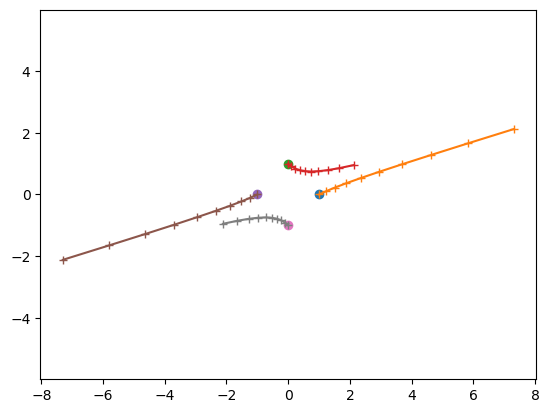

In [8]:
A = np.array([[2, 1], [1, -1]])  # modify this!
linear2D(A, t=np.arange(0, 1, 0.1))

2) Real eigenvalues $\lambda_1 > 0 > \lambda_2$

3) Real eigenvalues $0 > \lambda_1 > \lambda_2$

4) Complex eigenvalues $\lambda_1=a+ib$ and $\lambda_2=a-ib$ with $a>0$

5) Complex eigenvalues $\lambda_1=a+ib$ and $\lambda_2=a-ib$ with $a<0$

c.f. For a 2 by 2 matrix

$$ A = \pmatrix{a & b \\ c & d}, $$

we can analytically derive the eivenvalues from 

$$ \det (A - \lambda I) = (a-\lambda)(d-\lambda) - bc = 0 $$

as

$$ \lambda = \frac{a+d}{2} \pm \sqrt{\frac{(a-d)^2}{4}+ bc}. $$

## 2. Nonlinear ODEs
1) Implement a nonlinear system, such as a pendulum with friction $\mu$:

$$ \frac{d\theta}{dt} = \omega $$

$$ ml^2 \frac{d\omega}{dt} = - \mu \omega - mgl \sin \theta $$

In [13]:
def pendulum(y, t, m=1, l=1, mu=1, g=9.8):
    """pendulum dynamics
    m:mass, l:length, mu:damping, g:gravity"""
    th, om = y
    dth = om
    dom = (-mu*om - m*g*l*np.sin(th))/(m*l^2)
    return [dth, dom]

2) Run a simulation by `odeint()` and show the trajectory as (t, y(t))

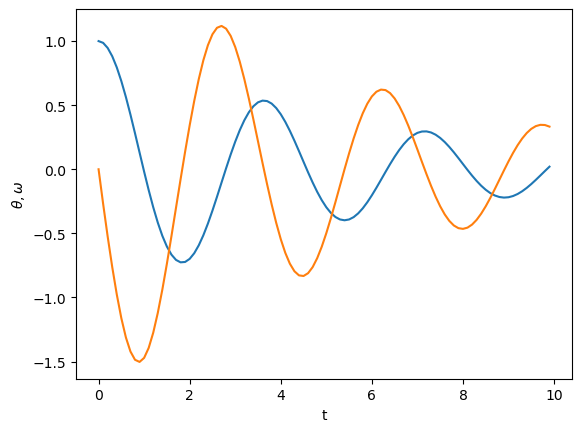

In [29]:
y0 = np.array([1, 0])
t = np.arange(0, 10, 0.1)
y = odeint(pendulum, y0, t, args=(1,1,1,9.8))
plt.plot(t, y)
plt.xlabel('t'); plt.ylabel('$\\theta, \\omega$');

3) Show the trajectory in the 2D state space $(\theta, \omega)$

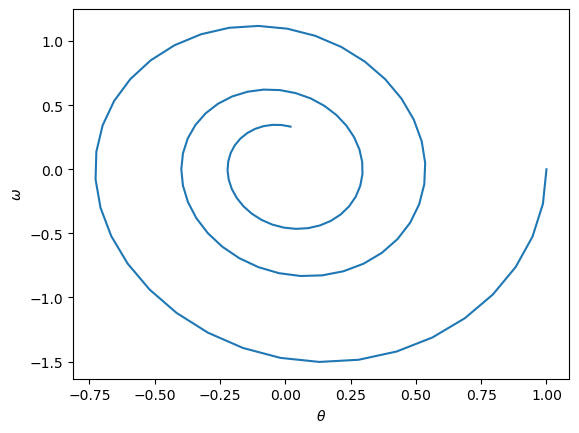

In [21]:
plt.plot(y[:,0], y[:,1])
plt.xlabel('$\\theta$'); plt.ylabel('$\\omega$');

Option) Implement a nonlinear system with time-dependent input, such as a forced pendulum:

$$ \frac{d\theta}{dt} = \omega $$

$$ ml^2 \frac{d\omega}{dt} = - \mu \omega - mgl \sin\theta + a\sin bt$$

and see how the behavior changes with the input.

## 3. Bifurcation
FitzHugh-Nagumo model is an extension of Van der Pol model to approximate spiking behaviors of neurons.

$$ \frac{dv}{dt} = v - \frac{v^3}{3} - w + I $$

$$ \frac{dw}{dt} = \phi (v + a - bw) $$

1) Implement a function and see how the behaviors at different input current $I$.

In [32]:
def fhn(y, t, I=0, a=0.7, b=0.8, phi=0.08):
    """FitzHugh-Nagumo model"""
    v, w = y
    dv = v - v**3/3 - w + I
    dw = phi*(v + a - b*w)
    return [dv, dw]

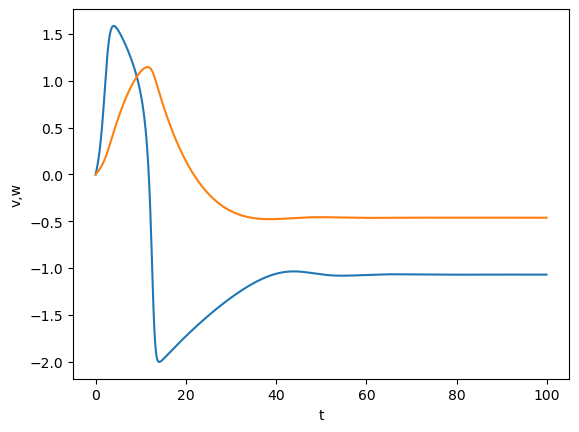

In [77]:
y0 = np.array([0, 0])
t = np.arange(0, 100, 0.1)
I = 0.2
y = odeint(fhn, y0, t, args=(I,))
plt.plot(t, y)
plt.xlabel('t'); plt.ylabel('v,w');

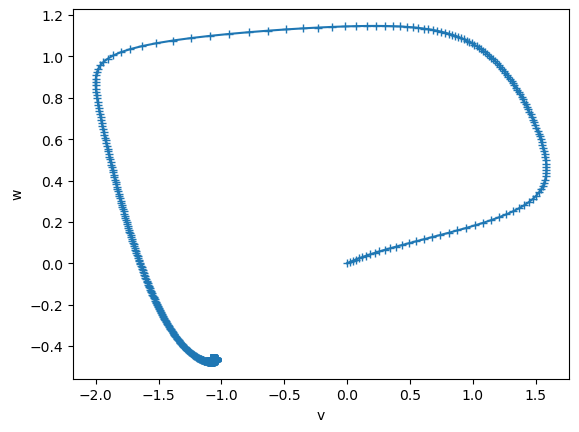

In [78]:
plt.plot(y[:,0], y[:,1], '+-')  # phase plot
plt.xlabel('v'); plt.ylabel('w');

Let us draw it over *nullclines*
$$ \frac{dv}{dt} = 0, \mbox{i.e. } w = v - \frac{v^3}{3} + I $$

$$ \frac{dw}{dt} = 0, \mbox{i.e. } w = (v + a)/b $$

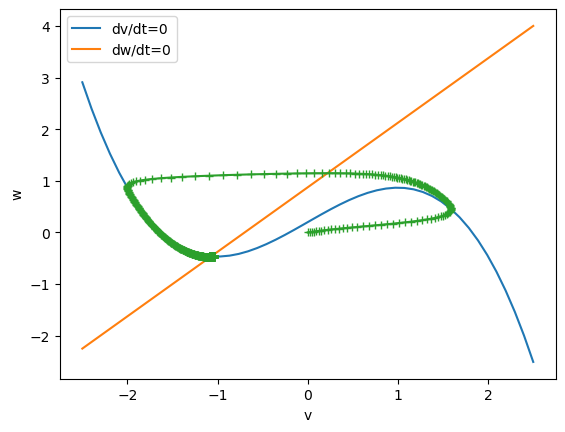

In [79]:
v = np.linspace(-2.5,2.5)
a=0.7; b=0.8
plt.plot(v, v-v**3/3+I)
plt.plot(v, (v+a)/b)
plt.plot(y[:,0], y[:,1], '+-')  # phase plot
plt.xlabel('v'); plt.ylabel('w'); plt.legend(['dv/dt=0','dw/dt=0'])

Let us consider the eigenvalues of the fixed point.
$$J = \pmatrix{1-v^2 & -1 \\ \phi & -\phi b} $$

In [80]:
phi=0.08
J = [[1-y[-1,0]**2, -1],[phi, -phi*b]]
print(J)
np.linalg.eig(J)

[[-0.1438305327663758, -1], [0.08, -0.064]]


EigResult(eigenvalues=array([-0.10391527+0.28001209j, -0.10391527-0.28001209j]), eigenvectors=array([[-0.96225045+0.j        , -0.96225045-0.j        ],
       [ 0.03840848+0.26944176j,  0.03840848-0.26944176j]]))

2) Draw a *bifurcation diagram* showing the max-min of $v$ for different values of $I$.

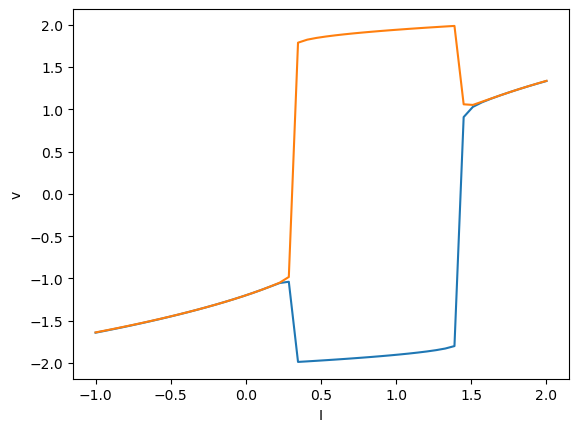

In [65]:
t = np.arange(0, 200, 0.1)
y0 = np.array([-1, 0])
I = np.linspace(-1,2)
ym = np.zeros((len(I),2))
for i, Ii in enumerate(I):
    y = odeint(fhn, y0, t, args=(Ii,))
    ym[i,0] = min(y[500:,0])
    ym[i,1] = max(y[500:,0])
plt.plot(I, ym[:,0])
plt.plot(I, ym[:,1])
plt.xlabel('I'); plt.ylabel('v');